In [5]:
import numpy as np
import pandas as pd


In [6]:
data = pd.read_csv("spam.csv", encoding="utf-8", encoding_errors="ignore")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
len(data.columns)

5

In [8]:
data.shape

(5572, 5)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
data.drop(columns=["Unnamed: 2", "Unnamed: 3","Unnamed: 4"], inplace=True)

In [11]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will _ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
data.rename(columns={"v1":"Target", "v2":"Text"},inplace=True)

In [13]:
data

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will _ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
encoder = LabelEncoder()
data["Target"] = encoder.fit_transform(data["Target"])

In [16]:
data

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will _ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [17]:
data.isnull().sum()

Target    0
Text      0
dtype: int64

In [18]:
data.duplicated().sum()

np.int64(404)

In [19]:
data.drop_duplicates(keep="first", inplace=True)

In [20]:
data.duplicated().sum()

np.int64(0)

2.EDA

In [22]:
data.sample(5)

,Target,Text
5239,0,"Jay wants to work out first, how's 4 sound?"
1759,0,Do u ever get a song stuck in your head for no...
435,0,The message sent is askin for &lt;#&gt; dolla...
5161,0,Lol no. I just need to cash in my nitros. Hurr...
2509,0,U wake up already? Wat u doing? U picking us u...


In [23]:
data["Target"].value_counts()

Target
0    4516
1     652
Name: count, dtype: int64

In [24]:
import matplotlib.pyplot as plt

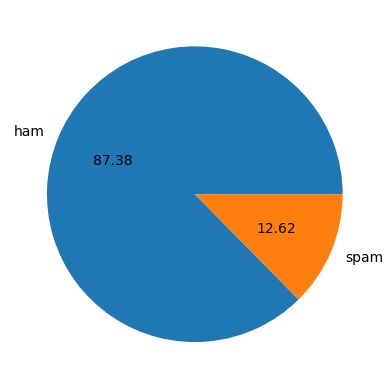

In [25]:
plt.pie(data["Target"].value_counts(), labels=["ham", "spam"], autopct="%0.2f")
plt.show()

In [26]:
import nltk

In [27]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\syedr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
data["Text"]

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will _ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Text, Length: 5168, dtype: object

In [29]:
data["num_characters"] = data["Text"].apply(len)

In [30]:
data

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,159
5568,0,Will _ b going to esplanade fr home?,36
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [31]:
data["word_character"] = data["Text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [32]:
data

,Target,Text,num_characters,word_character
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,159,35
5568,0,Will _ b going to esplanade fr home?,36,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [33]:
data["Sen_count"] = data["Text"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [34]:
data

,Target,Text,num_characters,word_character,Sen_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,159,35,4
5568,0,Will _ b going to esplanade fr home?,36,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [35]:
data.columns

Index(['Target', 'Text', 'num_characters', 'word_character', 'Sen_count'], dtype='object')

In [36]:
data[["num_characters", "word_character", "Sen_count"]].describe()

,num_characters,word_character,Sen_count
count,5168.000000,5168.000000,5168.000000
mean,78.759481,18.441176,1.966331
std,58.104099,13.327587,1.449367
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
data[data["Target"] == 0][["num_characters", "word_character", "Sen_count"]].describe()

,num_characters,word_character,Sen_count
count,4516.000000,4516.000000,4516.000000
mean,70.344110,17.108946,1.819973
std,56.328803,13.494730,1.383228
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [38]:
data[data["Target"] == 1][["num_characters", "word_character", "Sen_count"]].describe()

,num_characters,word_character,Sen_count
count,652.000000,652.000000,652.000000
mean,137.047546,27.668712,2.980061
std,29.937352,7.015283,1.491780
min,13.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,156.000000,32.000000,4.000000
max,222.000000,46.000000,9.000000


In [39]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

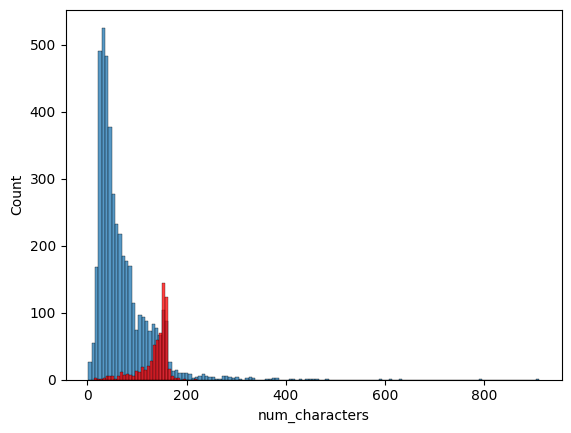

In [40]:
sns.histplot(data[data["Target"]==0 ]["num_characters"])
sns.histplot(data[data["Target"]==1 ]["num_characters"],color="red")

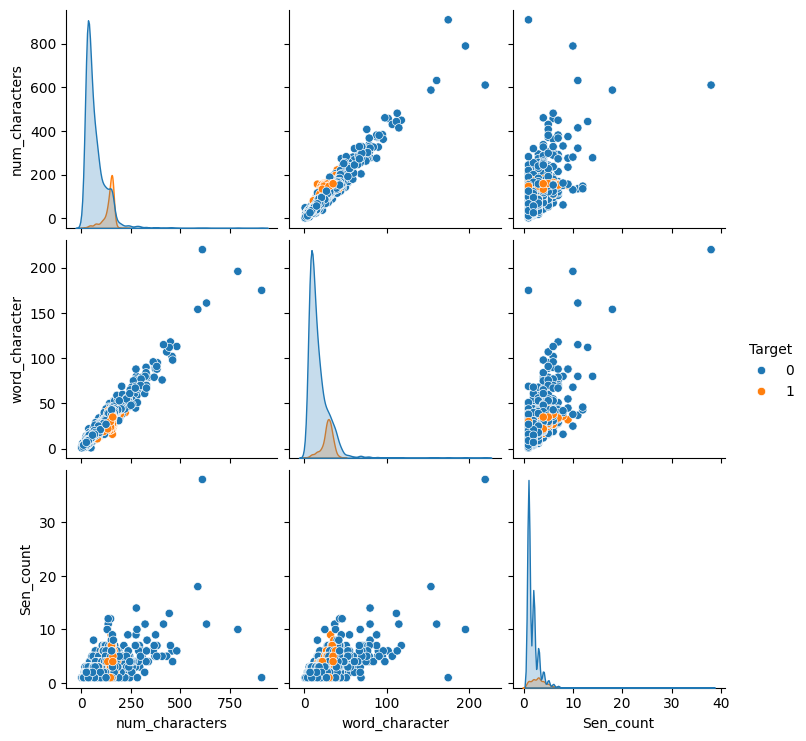

In [41]:
sns.pairplot(data, hue="Target")

data preprocessing
lower case
remove stop words, punctuation, specail character
stemming

In [43]:
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [44]:
ps = PorterStemmer()

In [45]:
def tranform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [46]:
tranform_text("he is ! @ walking on the road")

'walk road'

In [47]:
data["transform_text"] = data["Text"].apply(tranform_text)

In [48]:
data

,Target,Text,num_characters,word_character,Sen_count,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,159,35,4,2nd time tri 2 contact u 750 pound prize 2 cla...
5568,0,Will _ b going to esplanade fr home?,36,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [49]:
from wordcloud import WordCloud

In [50]:
wc = WordCloud(width=500,height=500,background_color="white", min_font_size=10 )

In [51]:
spamwc = wc.generate(data[data["Target"]==1]["transform_text"].str.cat(sep=" "))

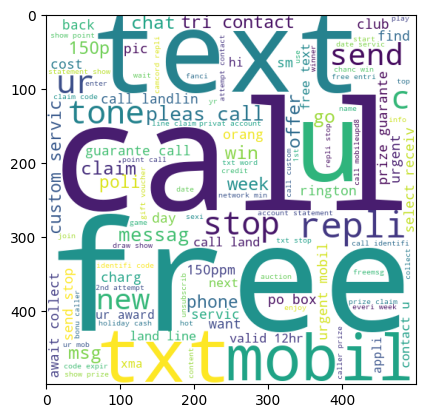

In [52]:
plt.imshow(spamwc)

In [107]:
msg_corpus = []
for msg in data[data["Target"]==1]["transform_text"].tolist():
    for words in msg.split():
        msg_corpus.append(words)
        
    

In [111]:
len(msg_corpus)

10106

In [113]:
from collections import Counter

In [117]:
Counter(msg_corpus).most_common

<bound method Counter.most_common of Counter({'call': 320, 'free': 191, '2': 155, 'txt': 141, 'text': 122, 'u': 119, 'ur': 119, 'mobil': 114, 'stop': 104, 'repli': 102, 'claim': 98, '4': 97, 'prize': 82, 'get': 74, 'new': 64, 'servic': 64, 'tone': 63, 'send': 60, 'urgent': 57, 'nokia': 57, 'contact': 56, 'award': 55, 'phone': 52, 'cash': 51, 'pleas': 51, 'week': 49, 'win': 47, 'c': 45, 'collect': 45, 'min': 45, 'custom': 42, 'messag': 42, 'guarante': 42, 'per': 41, 'chat': 38, 'tri': 37, '1000': 36, 'msg': 35, 'draw': 35, 'number': 35, 'cs': 35, 'show': 33, 'today': 33, '500': 33, 'offer': 33, 'line': 33, '100': 32, 'go': 32, 'receiv': 31, 'rington': 31, 'want': 31, 'latest': 30, '1': 30, 'landlin': 30, '150ppm': 29, 'video': 29, 'voucher': 28, 'code': 27, 'holiday': 27, 'rate': 26, 'network': 26, 'select': 26, '150p': 26, 'date': 26, 'box': 26, 'day': 26, 'everi': 26, 'end': 25, 'appli': 24, '3': 24, 'r': 24, 'cost': 24, 'po': 24, 'orang': 24, 'await': 24, 'camera': 23, 'charg': 22, '

In [119]:
data.columns

Index(['Target', 'Text', 'num_characters', 'word_character', 'Sen_count',
       'transform_text'],
      dtype='object')

In [136]:
msg_corpus = []
for msg in data[data["Target"]==0]["transform_text"].tolist():
    for words in msg.split():
        msg_corpus.append(words)
        

In [138]:
Counter(msg_corpus).most_common

<bound method Counter.most_common of Counter({'u': 883, 'go': 404, 'get': 349, 'gt': 288, 'lt': 287, '2': 284, 'come': 275, 'got': 236, 'know': 236, 'like': 234, 'call': 233, 'time': 219, 'ok': 217, 'love': 216, 'good': 213, 'want': 208, 'ur': 197, 'day': 190, 'need': 170, 'one': 165, 'lor': 159, '4': 156, 'home': 152, 'think': 149, 'see': 147, 'take': 143, 'still': 143, 'da': 142, 'tell': 133, 'make': 129, 'dont': 129, 'say': 127, 'back': 127, 'today': 123, 'hope': 122, 'ask': 121, 'sorri': 121, 'n': 120, 'send': 120, 'r': 120, 'work': 118, 'meet': 112, 'hi': 111, 'well': 110, 'thing': 109, 'wat': 108, 'k': 107, 'much': 107, 'night': 107, 'oh': 106, 'miss': 106, 'happi': 104, 'give': 102, 'later': 100, 'hey': 100, 'great': 97, 'na': 96, 'wait': 96, 'way': 95, 'alreadi': 90, 'thank': 87, 'let': 86, 'yeah': 86, 'text': 85, 'feel': 83, 'realli': 83, 'pl': 83, 'im': 81, 'wan': 81, 'dear': 81, 'right': 80, 'e': 77, 'even': 77, 'friend': 77, 'sure': 76, 'said': 76, 'co': 76, 'would': 75, 'l

In [140]:
data

,Target,Text,num_characters,word_character,Sen_count,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,159,35,4,2nd time tri 2 contact u 750 pound prize 2 cla...
5568,0,Will _ b going to esplanade fr home?,36,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


MODEL BUILDING

In [143]:
data.head()

,Target,Text,num_characters,word_character,Sen_count,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [183]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [147]:
cv = CountVectorizer()
cv

,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None
,stop_words,None
,token_pattern,'(?u)\\b\\w\\w+\\b'
,ngram_range,"(1, ...)"
,analyzer,'word'


In [185]:
tf = TfidfVectorizer()
tf

,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None
,analyzer,'word'
,stop_words,None
,token_pattern,'(?u)\\b\\w\\w+\\b'
,ngram_range,"(1, ...)"


In [187]:
X = tf.fit_transform(data["transform_text"]).toarray()
X.shape

(5168, 6704)

In [189]:
y = data["Target"].values
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5168,))

In [191]:
from sklearn.model_selection import train_test_split

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [199]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix

In [201]:
gnb = GaussianNB()
bernb = BernoulliNB()
munb = MultinomialNB()

In [203]:
gnb.fit(X_train, y_train)
pred_01 = gnb.predict(X_test)
print(accuracy_score(pred_01, y_test))
print(confusion_matrix(pred_01, y_test))
print(precision_score(pred_01, y_test))

0.8752417794970987
[[784  23]
 [106 121]]
0.8402777777777778


In [205]:
bernb.fit(X_train, y_train)
pred_01 = bernb.predict(X_test)
print(accuracy_score(pred_01, y_test))
print(confusion_matrix(pred_01, y_test))
print(precision_score(pred_01, y_test))

0.9709864603481625
[[887  27]
 [  3 117]]
0.8125


In [207]:
munb.fit(X_train, y_train)
pred_01 = munb.predict(X_test)
print(accuracy_score(pred_01, y_test))
print(confusion_matrix(pred_01, y_test))
print(precision_score(pred_01, y_test))

0.9613152804642167
[[890  40]
 [  0 104]]
0.7222222222222222
